<a href="https://colab.research.google.com/github/singaevsky/portfolio_Python/blob/main/amazon_marketplace_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Zerocoding/Python+ChatGPT/PN14/amazon_market_data.csv')

In [ ]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# Приведение столбцов к стилю camel_case

In [ ]:
def to_camel_case(s):
    parts = s.split()
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]

# Приведение типов данных

In [ ]:
df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%y')

# Поиск дублей и пропусков в данных

In [ ]:

# 4. Проверка на полные дубликаты
full_duplicates = df[df.duplicated()]
print(f"Количество полных дубликатов: {len(full_duplicates)}")
if not full_duplicates.empty:
    print("Примеры дубликатов:")
    print(full_duplicates.head())

# 5. Проверка дубликатов по ключевому полю (например, orderId)
key_duplicates = df[df.duplicated('orderId', keep=False)]
print(f"\nКоличество записей с повторяющимся orderId: {len(key_duplicates)}")
if not key_duplicates.empty:
    print("Примеры по orderId:")
    print(key_duplicates.sort_values('orderId').head())

# 6. Проверка пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# 7. Общая информация о датафрейме
print("\nИнформация о датафрейме:")
print(df.info())

Количество полных дубликатов: 0

Количество записей с повторяющимся orderId: 2437
Примеры по orderId:
      orderDate  rowId         orderId        shipMode customerId    segment  \
2481 2020-11-06   1229  CA-2017-100013  Standard Class   ZC-21910   Consumer   
2482 2020-11-06   1230  CA-2017-100013  Standard Class   ZC-21910   Consumer   
2483 2020-11-06   1231  CA-2017-100013  Standard Class   ZC-21910   Consumer   
924  2020-05-28   9132  CA-2017-100055  Standard Class   MD-17860  Corporate   
925  2020-05-28   9133  CA-2017-100055  Standard Class   MD-17860  Corporate   

            country         city       state  postalCode region  \
2481  United States  Los Angeles  California       90045   West   
2482  United States  Los Angeles  California       90045   West   
2483  United States  Los Angeles  California       90045   West   
924   United States       Laurel    Maryland       20707   East   
925   United States       Laurel    Maryland       20707   East   

            pr

# Исследовательский анализ данных

Описательная статистика:
                           orderDate        rowId    postalCode         sales  \
count                           3312  3312.000000   3312.000000   3312.000000   
mean   2020-08-07 06:03:02.608695808  5087.107488  56186.515097    221.381418   
min              2020-01-01 00:00:00    13.000000   1841.000000      0.444000   
25%              2020-05-15 00:00:00  2655.750000  27978.750000     17.018000   
50%              2020-09-02 00:00:00  5183.500000  60472.500000     53.810000   
75%              2020-11-06 00:00:00  7498.250000  90032.000000    205.105700   
max              2020-12-30 00:00:00  9994.000000  99301.000000  13999.960000   
std                              NaN  2817.482266  31980.375516    585.257531   

          quantity     discount       profit  
count  3312.000000  3312.000000  3312.000000  
mean      3.766908     0.156467    28.212340  
min       1.000000     0.000000 -3839.990400  
25%       2.000000     0.000000     1.763200  
50%       

/tmp/ipython-input-1271787177.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['sales'].resample('M').sum()
/tmp/ipython-input-1271787177.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = df['profit'].resample('M').sum()


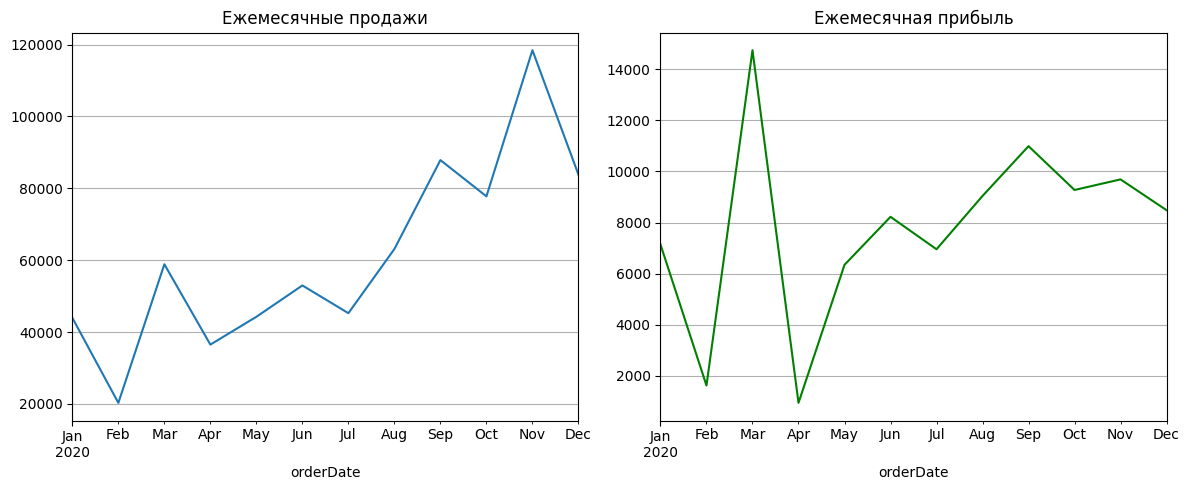

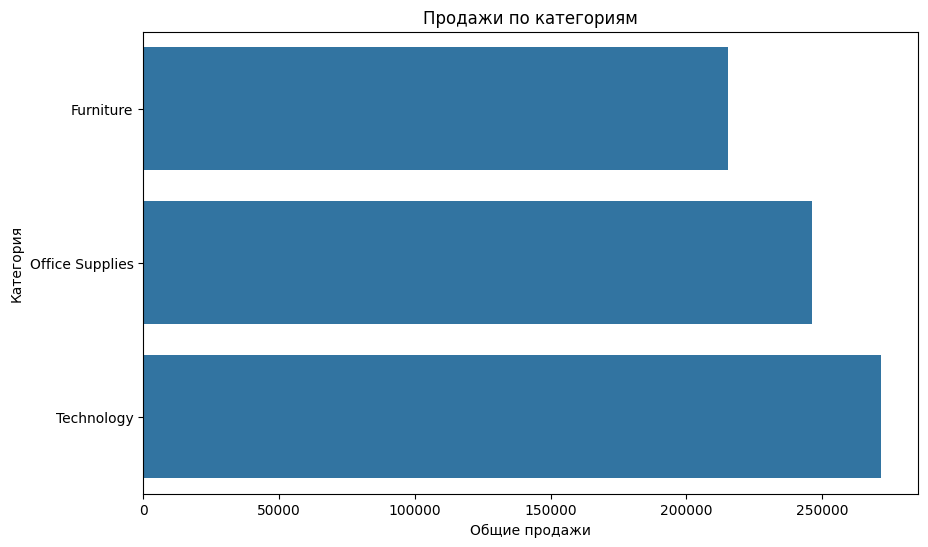

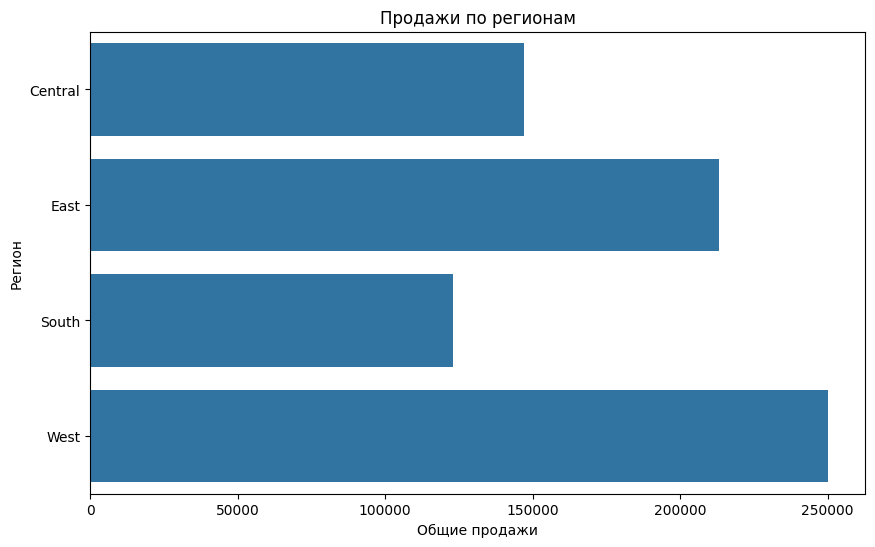

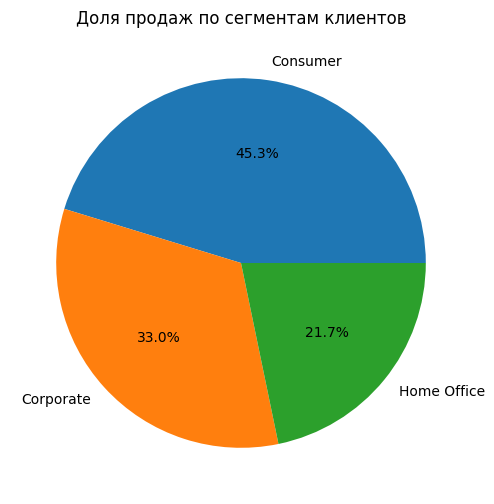

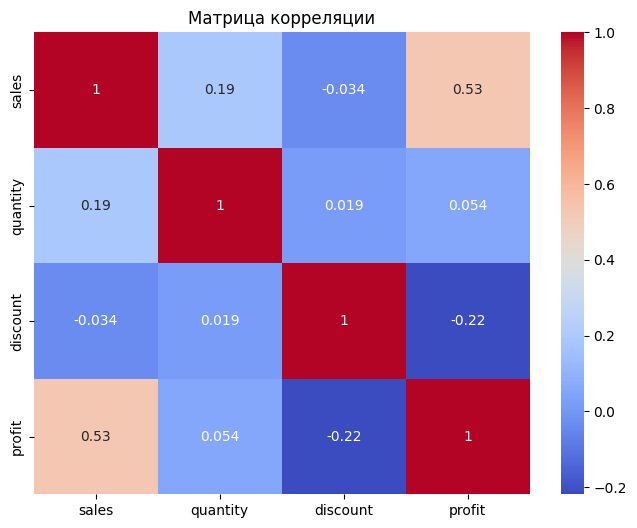

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Описательная статистика
print("Описательная статистика:")
print(df.describe())

# 2. Тренды по времени
df.set_index('orderDate', inplace=True)
monthly_sales = df['sales'].resample('M').sum()
monthly_profit = df['profit'].resample('M').sum()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
monthly_sales.plot(title='Ежемесячные продажи')
plt.grid(True)

plt.subplot(1, 2, 2)
monthly_profit.plot(title='Ежемесячная прибыль', color='green')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Продажи по категориям
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='category', data=df.groupby('category')['sales'].sum().reset_index(), estimator=sum)
plt.title('Продажи по категориям')
plt.xlabel('Общие продажи')
plt.ylabel('Категория')
plt.show()

# 4. Продажи по регионам
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='region', data=df.groupby('region')['sales'].sum().reset_index(), estimator=sum)
plt.title('Продажи по регионам')
plt.xlabel('Общие продажи')
plt.ylabel('Регион')
plt.show()

# 5. Сегментация клиентов
plt.figure(figsize=(8, 6))
df.groupby('segment')['sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Доля продаж по сегментам клиентов')
plt.ylabel('')
plt.show()

# 6. Корреляция между Sales, Quantity, Profit
plt.figure(figsize=(8, 6))
corr = df[['sales', 'quantity', 'discount', 'profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# сколько уникальных заказов?
# Подсчёт количества уникальных заказов
unique_orders = df['orderId'].nunique()

print(f"Количество уникальных заказов: {unique_orders}")

Количество уникальных заказов: 1687


In [ ]:
# сколько уникальных клиентов?
# Подсчёт количества уникальных клиентов
unique_customers = df['customerId'].nunique()

print(f"Количество уникальных клиентов: {unique_customers}")
# Узнать, сколько заказов сделал каждый клиент
orders_per_customer = df.groupby('customerId')['orderId'].count().sort_values(ascending=False)
print(orders_per_customer.head(10))

Количество уникальных клиентов: 693
customerId
SV-20365    20
JL-15835    20
MH-18115    19
Dp-13240    19
LC-16870    17
AC-10615    16
SS-20140    16
JM-15250    15
DS-13030    15
DR-12880    15
Name: orderId, dtype: int64


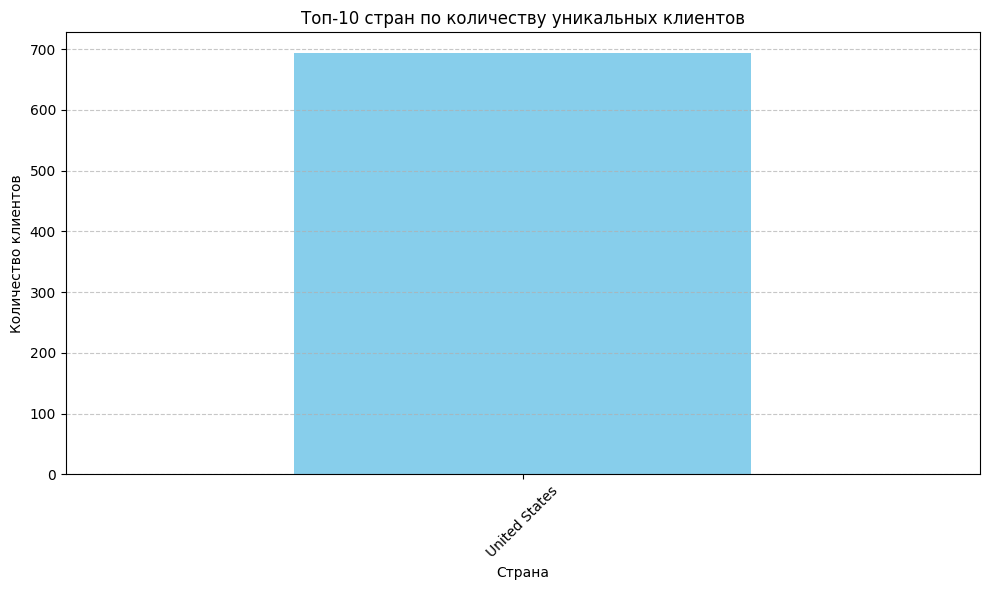

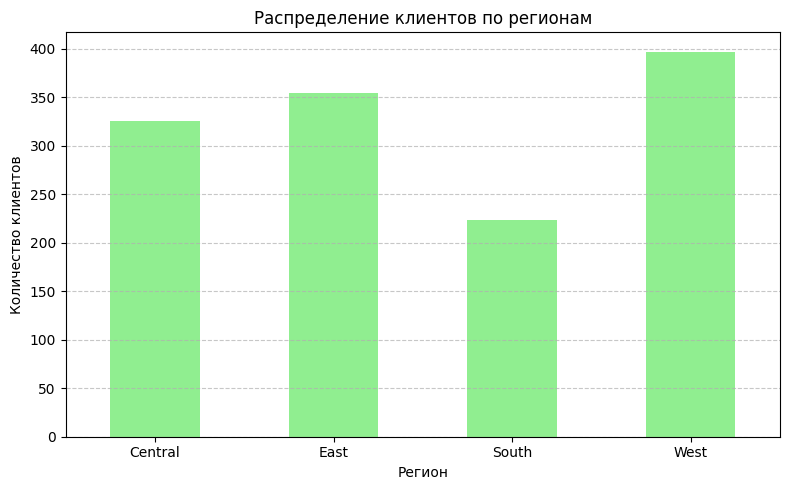

/tmp/ipython-input-1677000376.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


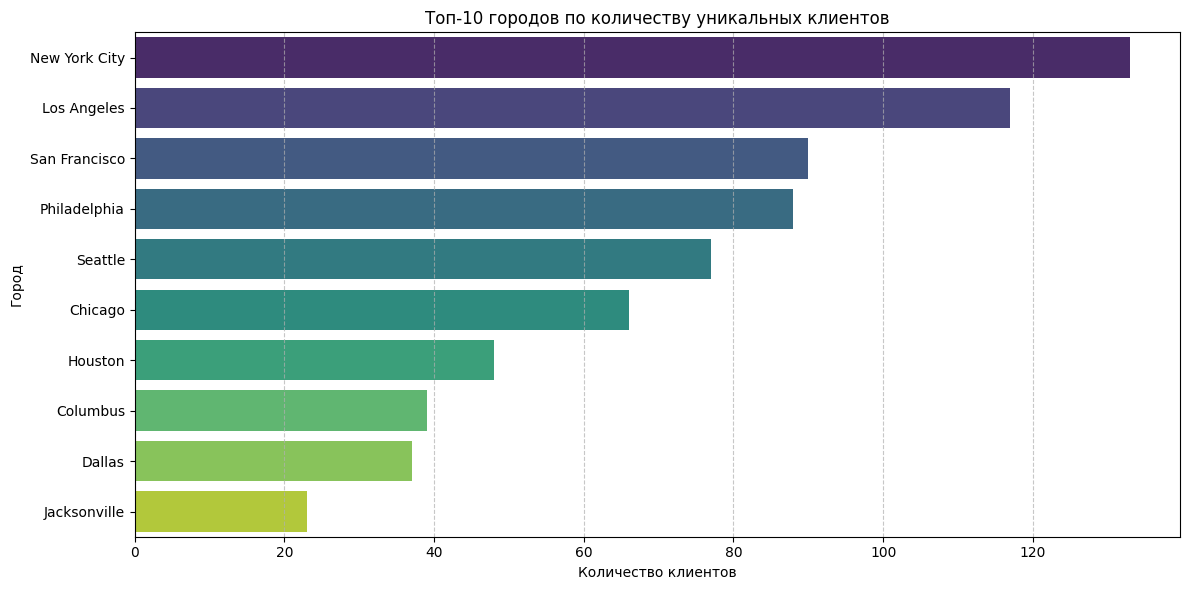

In [ ]:
# изучить локацию пользователей (визуализировать)

# 1. Клиенты по странам
plt.figure(figsize=(10, 6))
df.groupby('country')['customerId'].nunique().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Топ-10 стран по количеству уникальных клиентов')
plt.xlabel('Страна')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Клиенты по регионам
plt.figure(figsize=(8, 5))
df.groupby('region')['customerId'].nunique().plot(kind='bar', color='lightgreen')
plt.title('Распределение клиентов по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Топ-10 городов по числу клиентов
plt.figure(figsize=(12, 6))
top_cities = df.groupby('city')['customerId'].nunique().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title('Топ-10 городов по количеству уникальных клиентов')
plt.xlabel('Количество клиентов')
plt.ylabel('Город')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-750030726.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_by_month = df.resample('M', on='orderDate').size()


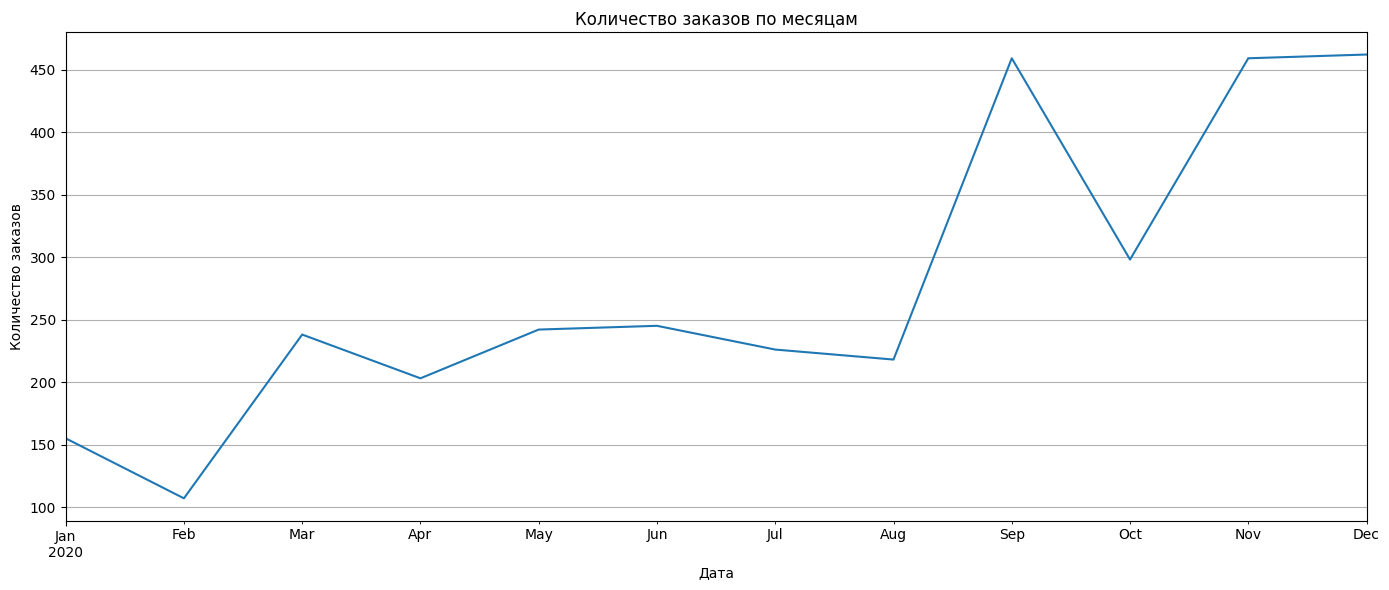

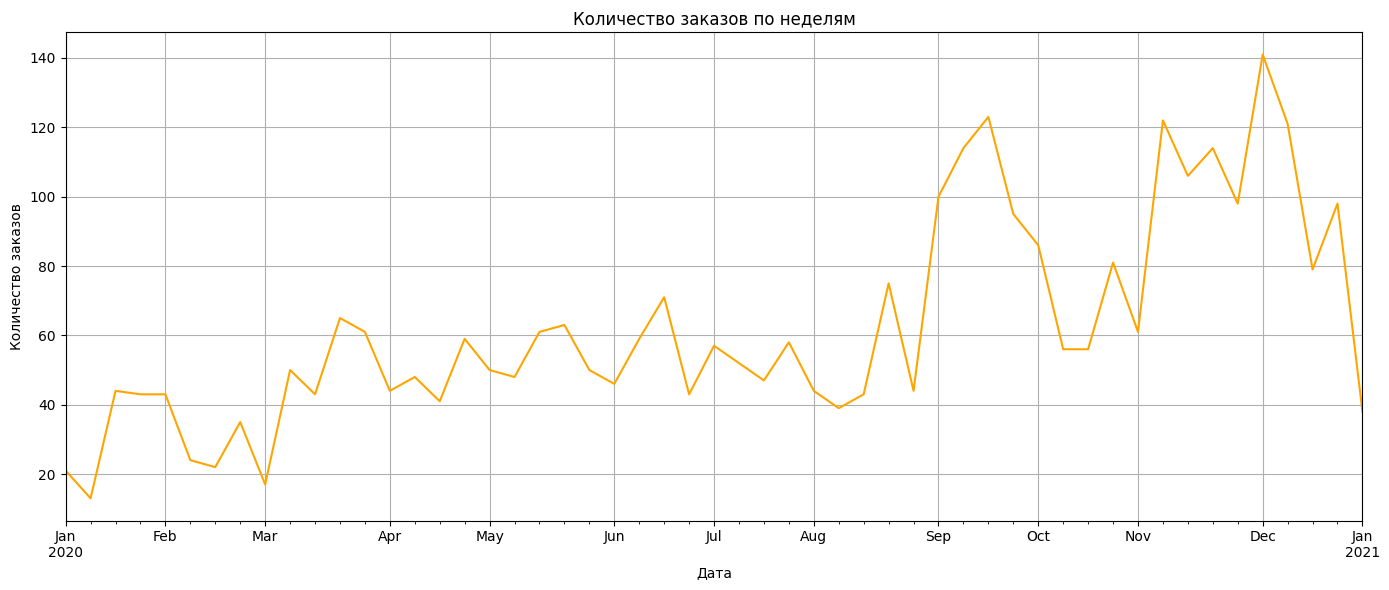


Топ-10 самых активных дней по количеству заказов:
orderDate
2020-09-02    36
2020-12-02    34
2020-12-01    34
2020-12-09    33
2020-12-08    30
2020-11-12    30
2020-09-09    29
2020-09-04    28
2020-11-06    27
2020-12-22    27
dtype: int64


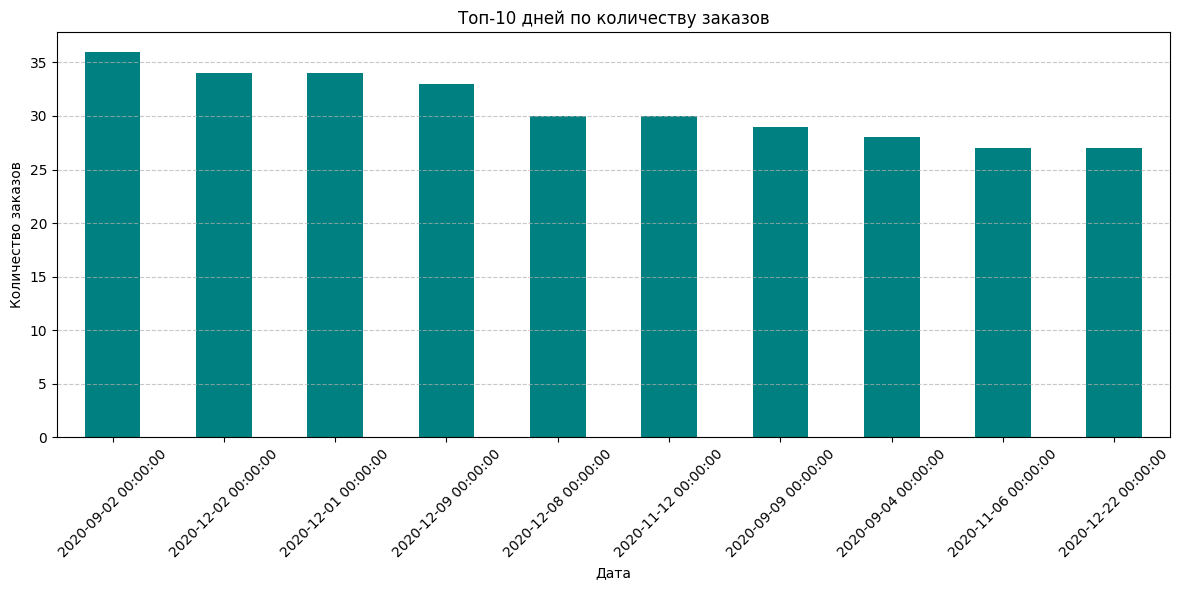

In [ ]:
# изучть динамику кол-ва заказов по дате заказов

# 1. Восстановим индекс, если ранее меняли (на случай, если orderDate был установлен как индекс)
df = df.reset_index(drop=True)

# 2. Подсчёт количества заказов по дням
orders_by_date = df.resample('D', on='orderDate').size()

# 3. Еженедельная динамика
orders_by_week = df.resample('W', on='orderDate').size()

# 4. Ежемесячная динамика
orders_by_month = df.resample('M', on='orderDate').size()

# 5. График ежемесячных заказов
plt.figure(figsize=(14, 6))
orders_by_month.plot(title='Количество заказов по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. График еженедельных заказов
plt.figure(figsize=(14, 6))
orders_by_week.plot(title='Количество заказов по неделям', color='orange')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Топ-10 самых "активных" дней по количеству заказов
top_days = orders_by_date.sort_values(ascending=False).head(10)
print("\nТоп-10 самых активных дней по количеству заказов:")
print(top_days)

# 8. График топ-10 дней
plt.figure(figsize=(12, 6))
top_days.plot(kind='bar', color='teal')
plt.title('Топ-10 дней по количеству заказов')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-42166509.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_sorted.resample('M', on='orderDate')['sales'].sum()


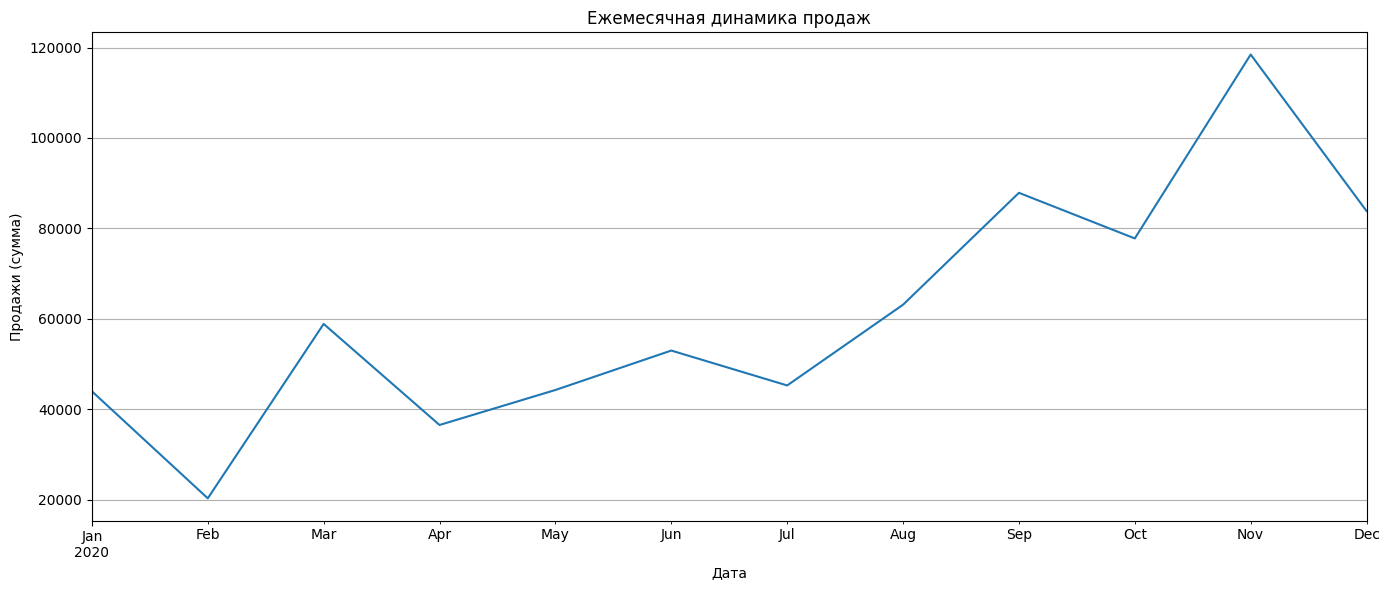

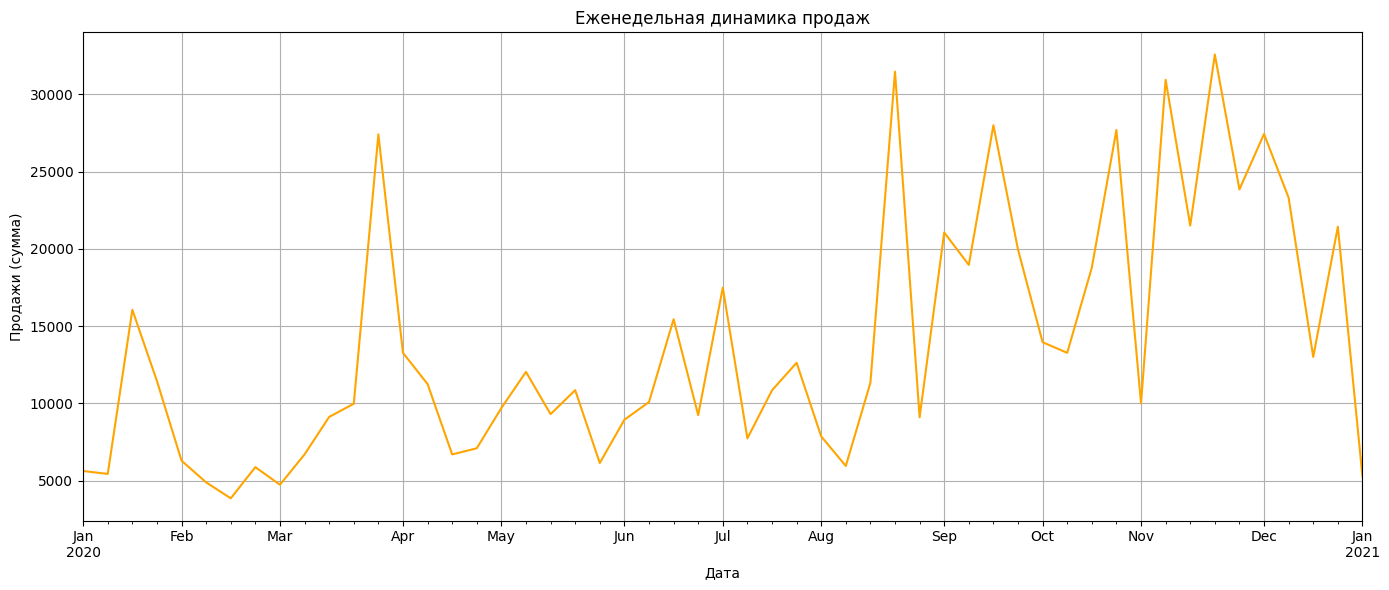


Топ-10 дней по сумме продаж:
orderDate
2020-10-22    15158.8770
2020-03-23    14816.0680
2020-11-17    13694.8828
2020-11-04    10668.0960
2020-12-02     9951.1820
2020-08-17     9517.2880
2020-09-02     9354.8540
2020-08-21     8551.0540
2020-10-13     8405.8020
2020-09-22     7871.2130
Name: sales, dtype: float64


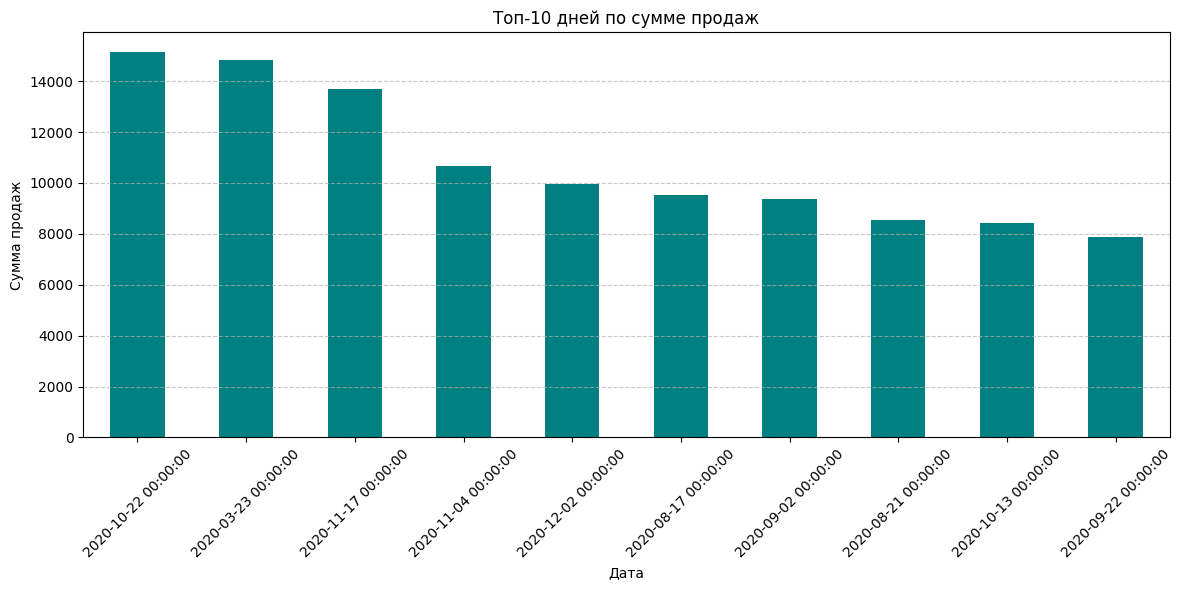

In [ ]:
# изучть динамику продаж по дате заказов

# Убедимся, что 'orderDate' в формате datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# 1. Сортировка по дате (на всякий случай)
df_sorted = df.sort_values('orderDate').copy()

# 2. Ежедневные продажи
daily_sales = df_sorted.resample('D', on='orderDate')['sales'].sum()

# 3. Еженедельные продажи
weekly_sales = df_sorted.resample('W', on='orderDate')['sales'].sum()

# 4. Ежемесячные продажи
monthly_sales = df_sorted.resample('M', on='orderDate')['sales'].sum()

# 5. График ежемесячных продаж
plt.figure(figsize=(14, 6))
monthly_sales.plot(title='Ежемесячная динамика продаж')
plt.xlabel('Дата')
plt.ylabel('Продажи (сумма)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. График еженедельных продаж
plt.figure(figsize=(14, 6))
weekly_sales.plot(title='Еженедельная динамика продаж', color='orange')
plt.xlabel('Дата')
plt.ylabel('Продажи (сумма)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Топ-10 самых "горячих" дней по продажам
top_days = daily_sales.sort_values(ascending=False).head(10)
print("\nТоп-10 дней по сумме продаж:")
print(top_days)

# 8. График топ-10 дней
plt.figure(figsize=(12, 6))
top_days.plot(kind='bar', color='teal')
plt.title('Топ-10 дней по сумме продаж')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# изучить распределение продаж по категориям заказов

# Убедимся, что 'category' и 'sales' есть в датафрейме
# Группируем по категориям и считаем суммарные продажи
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)

# 1. Выведем таблицу с категориями и их долей в общих продажах
total_sales = category_sales.sum()
category_sales_percentage = (category_sales / total_sales * 100).round(2)
print("Продажи по категориям:")
print(category_sales.to_frame('total_sales').join(category_sales_percentage.to_frame('percentage')))


Продажи по категориям:
                 total_sales  percentage
category                                
Technology       271730.8110       37.06
Office Supplies  246097.1750       33.56
Furniture        215387.2692       29.38


/tmp/ipython-input-1155352588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.head(top_n).values, y=category_sales.head(top_n).index, palette='viridis')


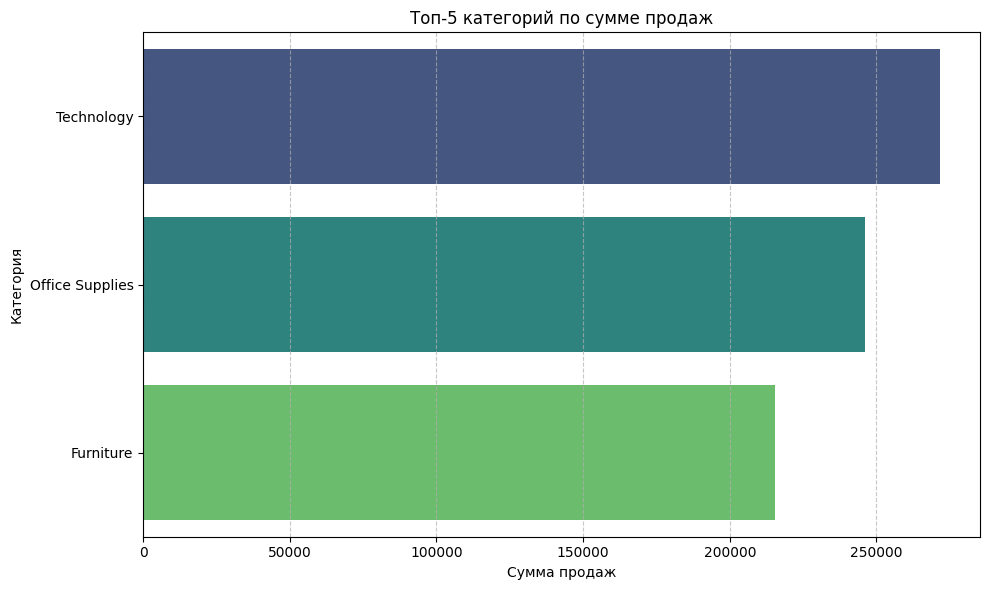

In [ ]:
# Топ-5 категорий
top_n = 5
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.head(top_n).values, y=category_sales.head(top_n).index, palette='viridis')
plt.title(f'Топ-{top_n} категорий по сумме продаж')
plt.xlabel('Сумма продаж')
plt.ylabel('Категория')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

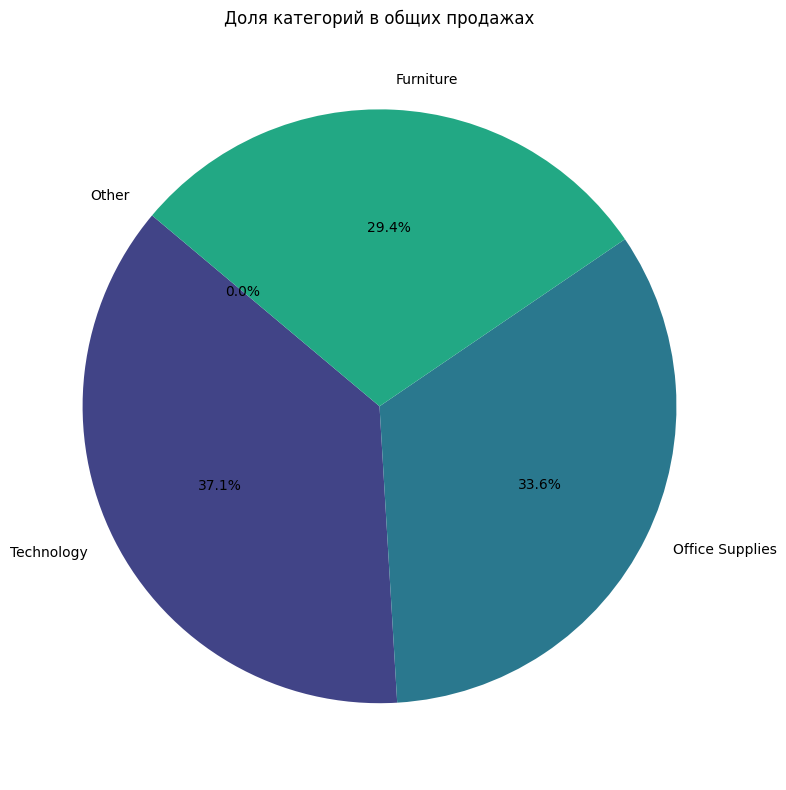

In [ ]:
# Отображаем только топ-5, остальное объединяем в "Other"
threshold = 5
category_sales_top = category_sales.head(threshold)
category_sales_other = pd.Series([category_sales.iloc[threshold:].sum()], index=['Other'])
category_sales_grouped = pd.concat([category_sales_top, category_sales_other])

# Круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(category_sales_grouped, labels=category_sales_grouped.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_sales_grouped)))
plt.title('Доля категорий в общих продажах')
plt.axis('equal')  # Для правильной круговой формы
plt.tight_layout()
plt.show()

In [ ]:
# Продажи + Прибыль по категориям
category_metrics = df.groupby('category')[['sales', 'profit']].sum()
category_metrics['profit_ratio'] = (category_metrics['profit'] / category_metrics['sales'] * 100).round(2)

print("\nПродажи и прибыль по категориям:")
print(category_metrics.sort_values(by='sales', ascending=False))


Продажи и прибыль по категориям:
                       sales      profit  profit_ratio
category                                              
Technology       271730.8110  50684.2566         18.65
Office Supplies  246097.1750  39736.6217         16.15
Furniture        215387.2692   3018.3913          1.40


Топ-10 городов по сумме продаж:
city
New York City    86939.6010
Seattle          56990.8200
Los Angeles      48875.6925
Philadelphia     41595.5020
San Francisco    37197.5510
Columbus         17571.4730
Chicago          16245.6110
Houston          16212.8064
Newark           13808.4680
Jackson          13592.2710
Name: sales, dtype: float64


/tmp/ipython-input-299026167.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


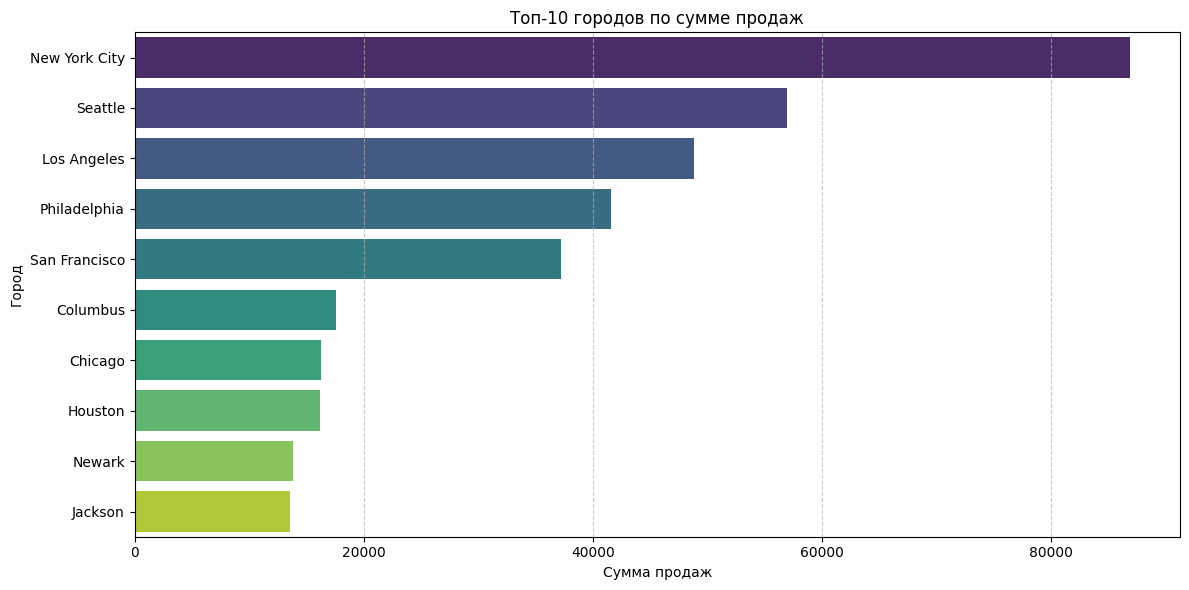

In [ ]:
# изучbть распределение продаж по городам (штатам)
# Убедимся, что 'city' и 'sales' присутствуют в датафрейме
# Группируем по городам и считаем суммарные продажи
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending=False)

# Выведем топ-10 городов
top_cities = city_sales.head(10)
print("Топ-10 городов по сумме продаж:")
print(top_cities)

# График: Топ-10 городов
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Топ-10 городов по сумме продаж')
plt.xlabel('Сумма продаж')
plt.ylabel('Город')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Топ-10 штатов по сумме продаж:
state
California        146388.3445
New York           93922.9950
Washington         65539.8960
Texas              43421.7582
Pennsylvania       42688.3060
Florida            26444.7155
Michigan           25833.6490
Illinois           24351.6110
North Carolina     23456.8290
Ohio               23264.8500
Name: sales, dtype: float64


/tmp/ipython-input-4265125648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='coolwarm')


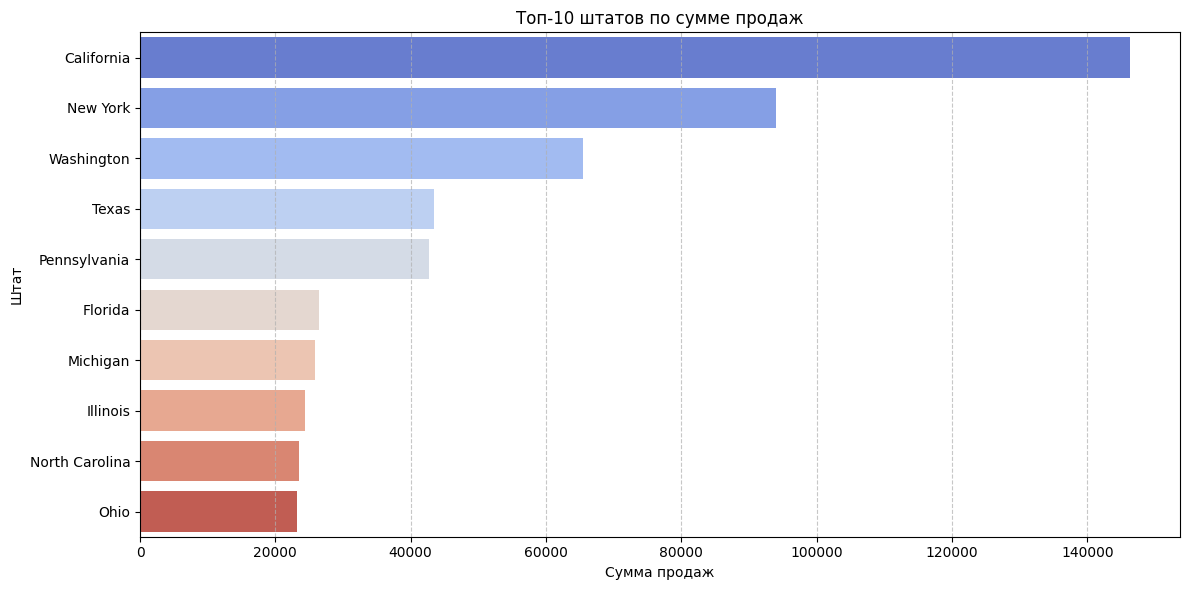

In [ ]:
# Группируем по штатам и считаем суммарные продажи
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False)

# Выведем топ-10 штатов
top_states = state_sales.head(10)
print("Топ-10 штатов по сумме продаж:")
print(top_states)

# График: Топ-10 штатов
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='coolwarm')
plt.title('Топ-10 штатов по сумме продаж')
plt.xlabel('Сумма продаж')
plt.ylabel('Штат')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
state_metrics = df.groupby('state')[['sales', 'profit']].sum()
state_metrics['profit_ratio'] = (state_metrics['profit'] / state_metrics['sales'] * 100).round(2)

print("\nПродажи и прибыль по штатам:")
print(state_metrics.sort_values(by='sales', ascending=False).head(10))


Продажи и прибыль по штатам:
                      sales      profit  profit_ratio
state                                                
California      146388.3445  29366.4589         20.06
New York         93922.9950  24357.0717         25.93
Washington       65539.8960  17256.7798         26.33
Texas            43421.7582  -8838.5049        -20.36
Pennsylvania     42688.3060  -5112.8034        -11.98
Florida          26444.7155    244.1266          0.92
Michigan         25833.6490   8487.7618         32.86
Illinois         24351.6110  -6745.5600        -27.70
North Carolina   23456.8290  -5088.5334        -21.69
Ohio             23264.8500  -1736.5270         -7.46


In [ ]:
# Топ-города внутри каждого штата
top_cities_by_state = df.groupby(['state', 'city'])['sales'].sum().groupby(level=0, group_keys=False).nlargest(3)

print("\nТоп-3 города в каждом штате по сумме продаж:")
print(top_cities_by_state)


Топ-3 города в каждом штате по сумме продаж:
state          city      
Alabama        Huntsville     845.440
               Hoover         525.850
               Decatur        254.860
Arizona        Phoenix       3321.201
               Tucson        1660.392
                               ...   
Washington     Renton        1242.632
West Virginia  Wheeling      1209.824
Wisconsin      Milwaukee     3292.280
               Madison       1816.360
               Kenosha        399.950
Name: sales, Length: 129, dtype: float64


In [ ]:
# найти самые популярные товары (Product Name)

# 1. Топ-товаров по количеству проданных единиц
top_products_by_quantity = df.groupby('productName')['quantity'].sum().sort_values(ascending=False).head(10)

# 2. Топ-товаров по сумме продаж
top_products_by_sales = df.groupby('productName')['sales'].sum().sort_values(ascending=False).head(10)

# Вывод таблиц
print("ТОП-10 товаров по количеству проданных единиц:")
print(top_products_by_quantity)

print("\nТОП-10 товаров по сумме продаж:")
print(top_products_by_sales)

ТОП-10 товаров по количеству проданных единиц:
productName
Staples                                                                           68
Easy-staple paper                                                                 58
Staples in misc. colors                                                           52
Staple envelope                                                                   39
Storex Dura Pro Binders                                                           37
Eldon Wave Desk Accessories                                                       34
Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive                               34
Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table    30
Logitech Desktop MK120 Mouse and keyboard Combo                                   29
Adjustable Depth Letter/Legal Cart                                                29
Name: quantity, dtype: int64

ТОП-10 товаров по сумме продаж:
productName
Canon imageCLASS 

/tmp/ipython-input-1532884132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_by_quantity.values, y=top_products_by_quantity.index, palette='viridis')


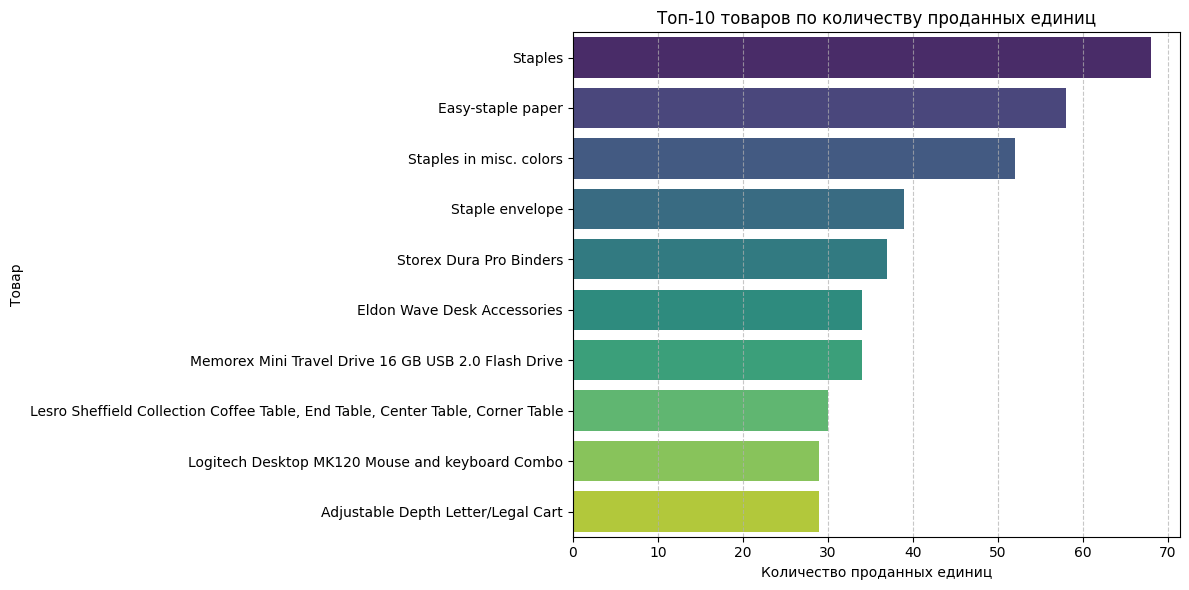

In [ ]:
#  Топ-10 товаров по количеству продаж
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_by_quantity.values, y=top_products_by_quantity.index, palette='viridis')
plt.title('Топ-10 товаров по количеству проданных единиц')
plt.xlabel('Количество проданных единиц')
plt.ylabel('Товар')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3731750558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_by_sales.values, y=top_products_by_sales.index, palette='coolwarm')


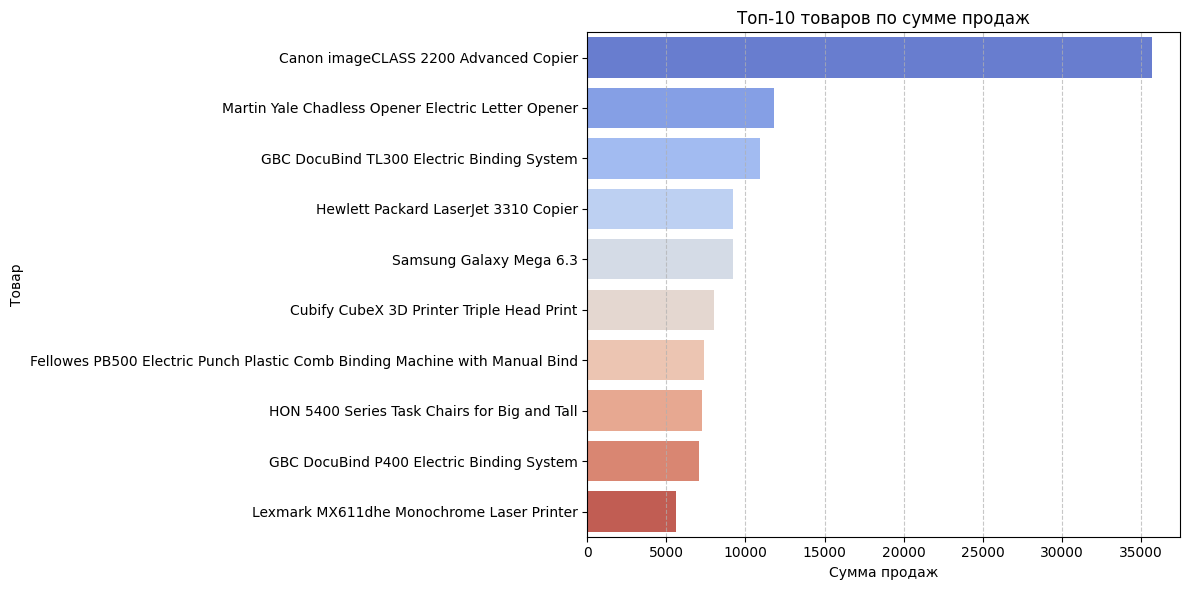

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_by_sales.values, y=top_products_by_sales.index, palette='coolwarm')
plt.title('Топ-10 товаров по сумме продаж')
plt.xlabel('Сумма продаж')
plt.ylabel('Товар')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Пример: топ-товары внутри категории 'Furniture'
furniture_products = df[df['category'] == 'Furniture'].groupby('productName')['sales'].sum().sort_values(ascending=False).head(5)
print("\nТОП-5 товаров в категории 'Furniture':")
print(furniture_products)


ТОП-5 товаров в категории 'Furniture':
productName
HON 5400 Series Task Chairs for Big and Tall                  7220.094
Global Troy Executive Leather Low-Back Tilter                 4659.114
Hon 4070 Series Pagoda Armless Upholstered Stacking Chairs    4346.777
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases      3636.468
Global Adaptabilites Bookcase, Cherry/Storm Gray Finish       3447.840
Name: sales, dtype: float64


In [ ]:
# изучить распределение категорий внутри городов (штатам)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Группировка: штат + категория → сумма продаж
state_category_sales = df.groupby(['state', 'category'])['sales'].sum().unstack(fill_value=0)

# Нормализация — доля каждой категории в штате (в процентах)
state_category_share = state_category_sales.div(state_category_sales.sum(axis=1), axis=0) * 100

# Вывод таблицы
print("Доля категорий в продажах по штатам (%):")
print(state_category_share.round(2).head(10))

Доля категорий в продажах по штатам (%):
category              Furniture  Office Supplies  Technology
state                                                       
Alabama                    8.32            72.19       19.49
Arizona                   40.44            22.88       36.68
Arkansas                   0.00            63.68       36.32
California                27.79            37.85       34.36
Colorado                  26.95            28.53       44.52
Connecticut               33.36            54.00       12.64
Delaware                   6.37            13.41       80.22
District of Columbia      48.46            51.54        0.00
Florida                   39.20            20.74       40.07
Georgia                   19.32            38.50       42.17


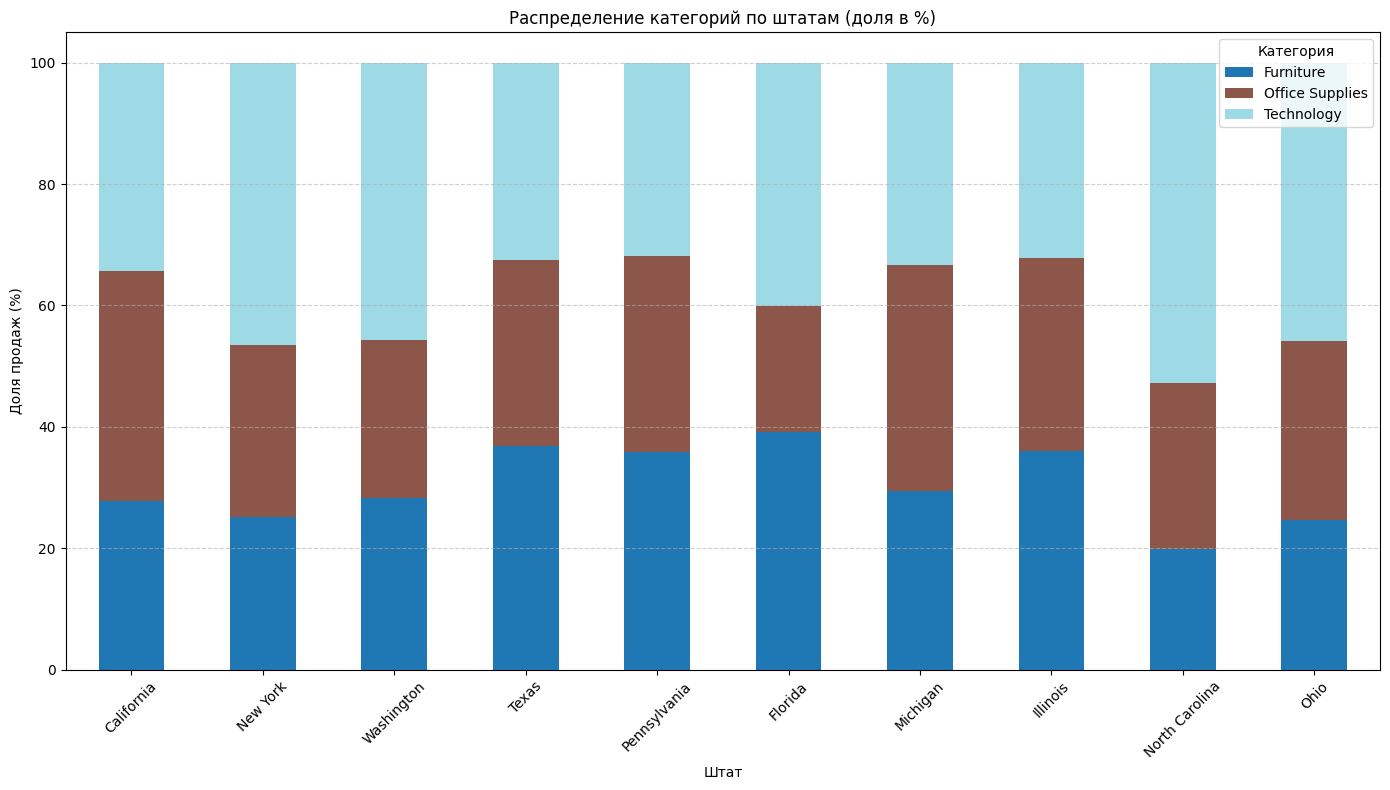

In [ ]:
# Выберем топ-N штатов по общим продажам для отображения
top_states = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10).index
filtered_data = state_category_share.loc[top_states]

# Построим стековый график
filtered_data.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Распределение категорий по штатам (доля в %)')
plt.xlabel('Штат')
plt.ylabel('Доля продаж (%)')
plt.xticks(rotation=45)
plt.legend(title='Категория')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


Доля категорий в продажах по городам (%):
category       Furniture  Office Supplies  Technology
city                                                 
Chicago            35.82            35.15       29.04
Columbus           10.04            40.43       49.53
Houston            30.81            30.22       38.97
Jackson            17.02            46.56       36.42
Los Angeles        28.88            30.75       40.37
New York City      25.12            27.18       47.70
Newark             11.23             6.95       81.83
Philadelphia       36.72            31.06       32.21
San Francisco      29.00            33.72       37.28
Seattle            25.82            26.41       47.76


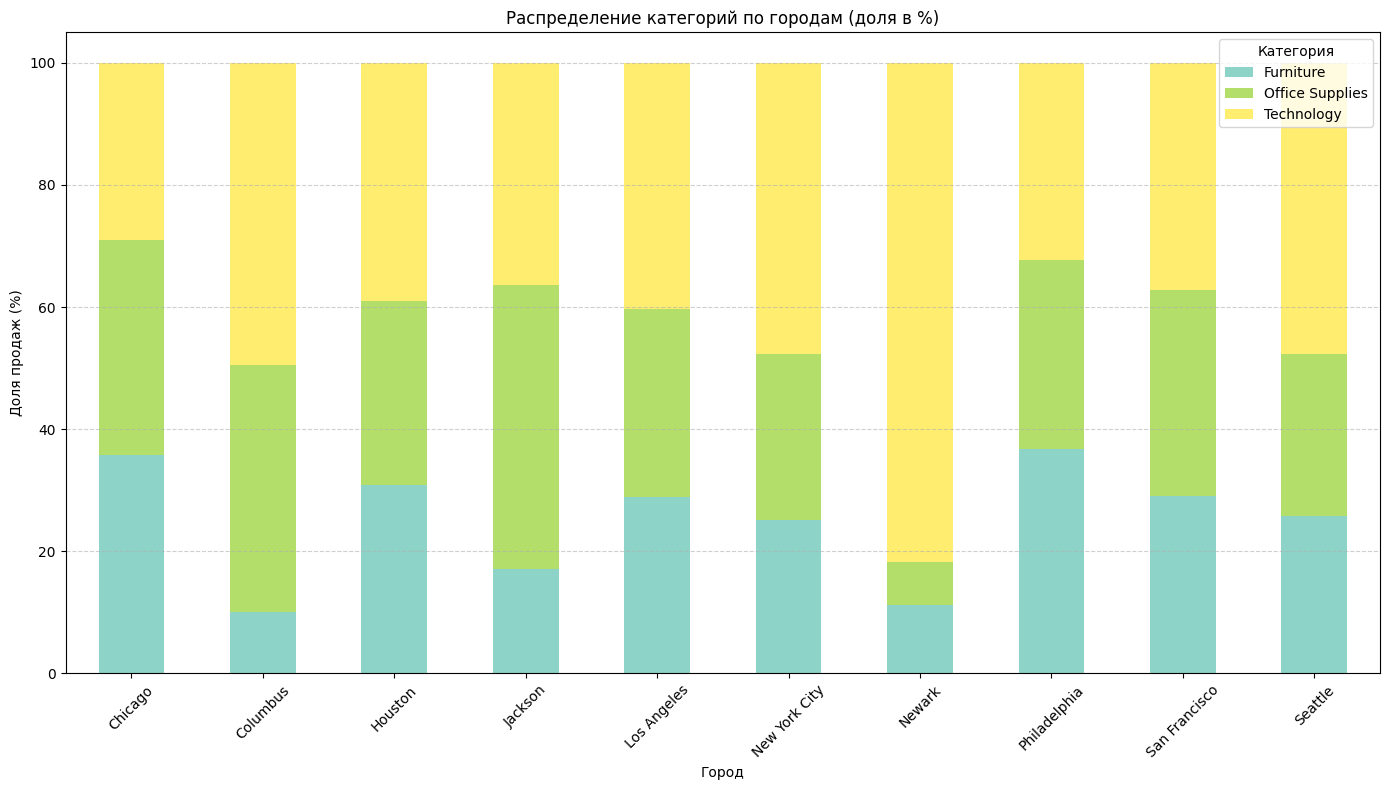

In [ ]:
# Топ-10 городов по продажам
top_cities = df.groupby('city')['sales'].sum().sort_values(ascending=False).head(10).index

# Группировка: город + категория → суммарные продажи
city_category_sales = df[df['city'].isin(top_cities)].groupby(['city', 'category'])['sales'].sum().unstack(fill_value=0)

# Нормализация — доля категорий в каждом городе
city_category_share = city_category_sales.div(city_category_sales.sum(axis=1), axis=0) * 100

# Выведем результат
print("\nДоля категорий в продажах по городам (%):")
print(city_category_share.round(2))

# График
city_category_share.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='Set3')
plt.title('Распределение категорий по городам (доля в %)')
plt.xlabel('Город')
plt.ylabel('Доля продаж (%)')
plt.xticks(rotation=45)
plt.legend(title='Категория')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
state_category_profit = df.groupby(['state', 'category'])['profit'].sum().unstack(fill_value=0)
state_category_profit_ratio = (state_category_profit / state_category_sales * 100).round(2)

print("\nРентабельность категорий по штатам (%):")
print(state_category_profit_ratio.head(10))


Рентабельность категорий по штатам (%):
category              Furniture  Office Supplies  Technology
state                                                       
Alabama                   25.60            30.94       13.77
Arizona                  -24.64             5.73       -7.65
Arkansas                    NaN            36.81       33.03
California                 6.12            30.03       20.35
Colorado                 -31.18           -11.70      -70.36
Connecticut               27.85            28.39       25.79
Delaware                   7.75            41.92       47.23
District of Columbia      42.00            48.00         NaN
Florida                  -12.91            10.00        9.76
Georgia                   22.61            37.88       34.86


In [ ]:
# Пример: топ-подкатегории в штате California
ca_subcategories = df[df['state'] == 'California'].groupby('sub-category')['sales'].sum().sort_values(ascending=False).head(5)
print("\nТОП-5 подкатегорий в штате California:")
print(ca_subcategories)


ТОП-5 подкатегорий в штате California:
sub-category
Binders        18074.864
Phones         15894.560
Storage        15266.660
Chairs         13678.816
Accessories    13535.500
Name: sales, dtype: float64


In [ ]:
# изучить динамику продаж внутри категорий


# Убедимся, что 'orderDate' в формате datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Добавляем месяц и год для агрегации
df['orderMonth'] = df['orderDate'].dt.to_period('M')

# 1. Группировка: месяц + категория → суммарные продажи
category_monthly_sales = df.groupby([df['orderMonth'], 'category'])['sales'].sum().unstack(fill_value=0)

# Выведем таблицу с динамикой
print("Динамика продаж по категориям (ежемесячно):")
print(category_monthly_sales.head())

Динамика продаж по категориям (ежемесячно):
category     Furniture  Office Supplies  Technology
orderMonth                                         
2020-01      5964.0320        21274.289   16733.053
2020-02      6866.3374         7407.772    6027.024
2020-03     10893.4448        14550.286   33428.622
2020-04      9065.9581        15072.191   12383.387
2020-05     16957.5582        13736.964   13566.588


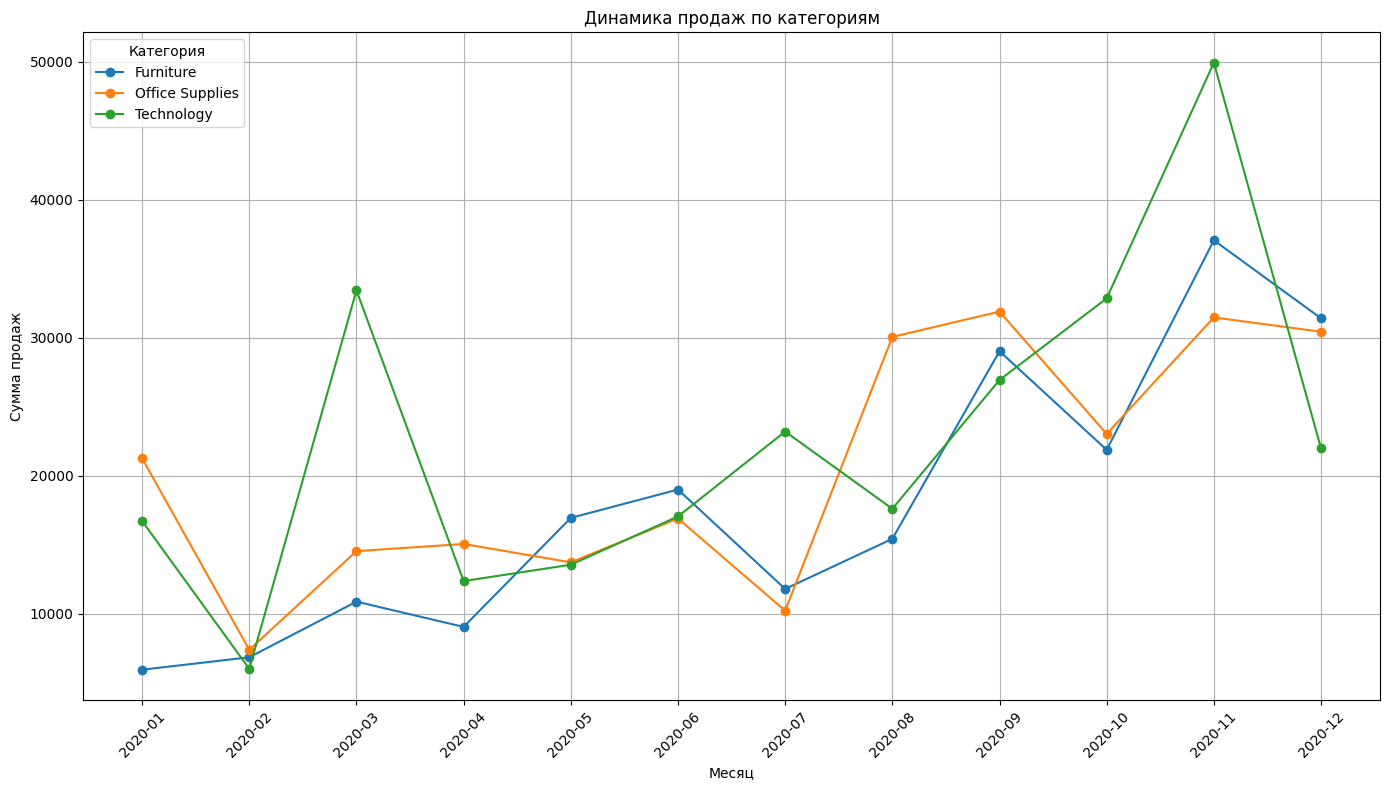

In [ ]:
plt.figure(figsize=(14, 8))
for category in category_monthly_sales.columns:
    plt.plot(category_monthly_sales.index.astype(str), category_monthly_sales[category], label=category, marker='o', linestyle='-')

plt.title('Динамика продаж по категориям')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.legend(title='Категория')
plt.grid(True)
plt.tight_layout()
plt.show()

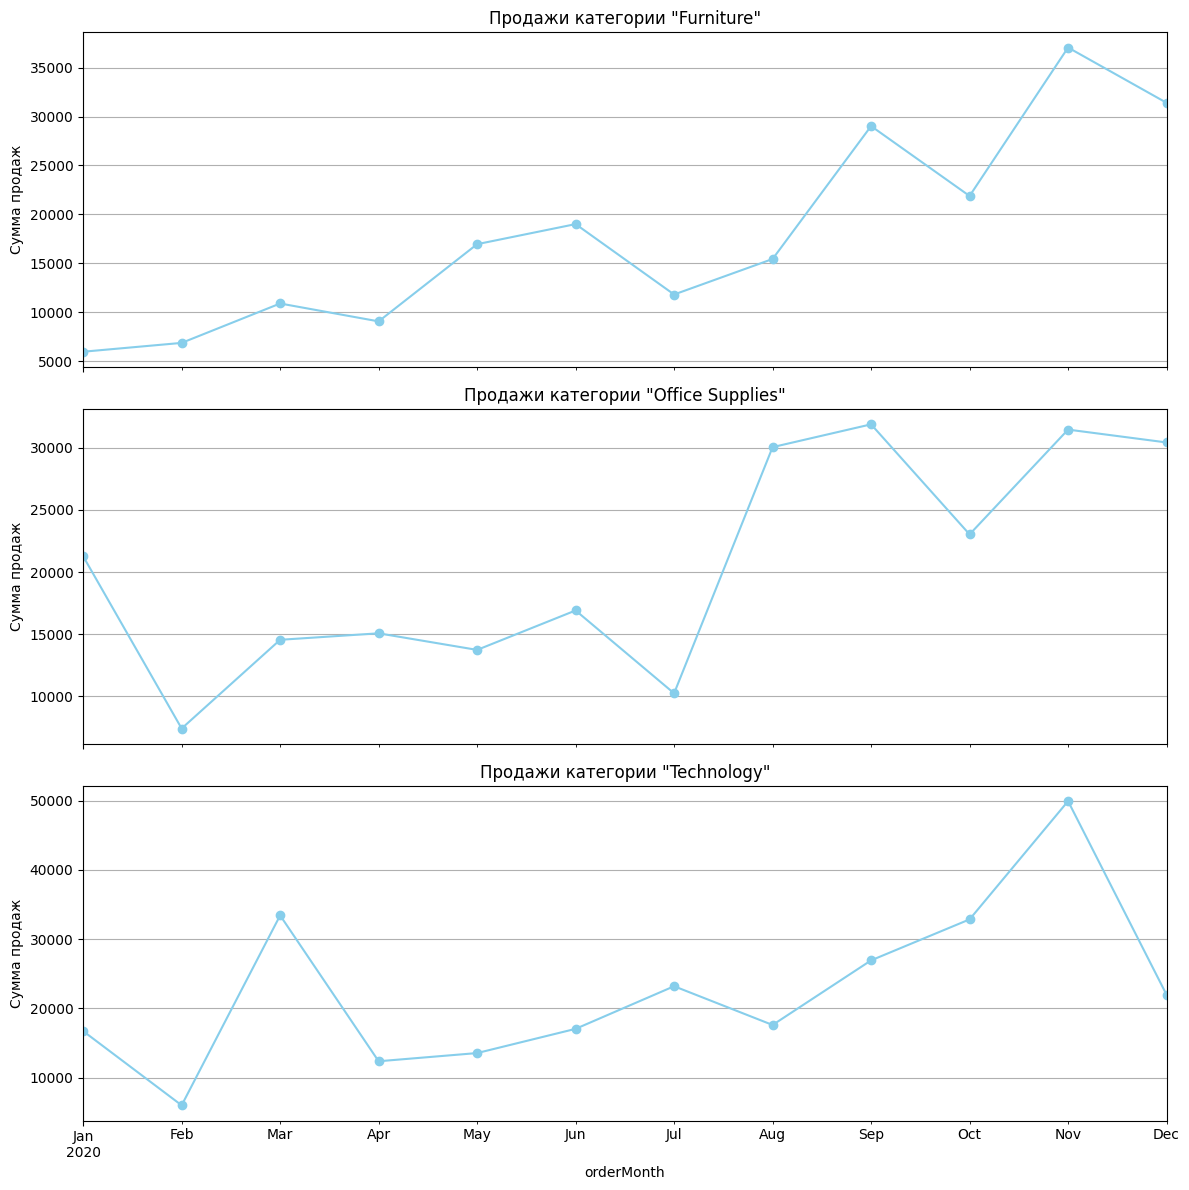

In [ ]:
# Отрисовываем отдельные графики по каждой категории
fig, axes = plt.subplots(nrows=len(category_monthly_sales.columns), figsize=(12, 4 * len(category_monthly_sales.columns)), sharex=True)

for ax, category in zip(axes, category_monthly_sales.columns):
    category_monthly_sales[category].plot(ax=ax, title=f'Продажи категории "{category}"', color='skyblue', marker='o')
    ax.set_ylabel('Сумма продаж')
    ax.grid(True)

plt.tight_layout()
plt.show()

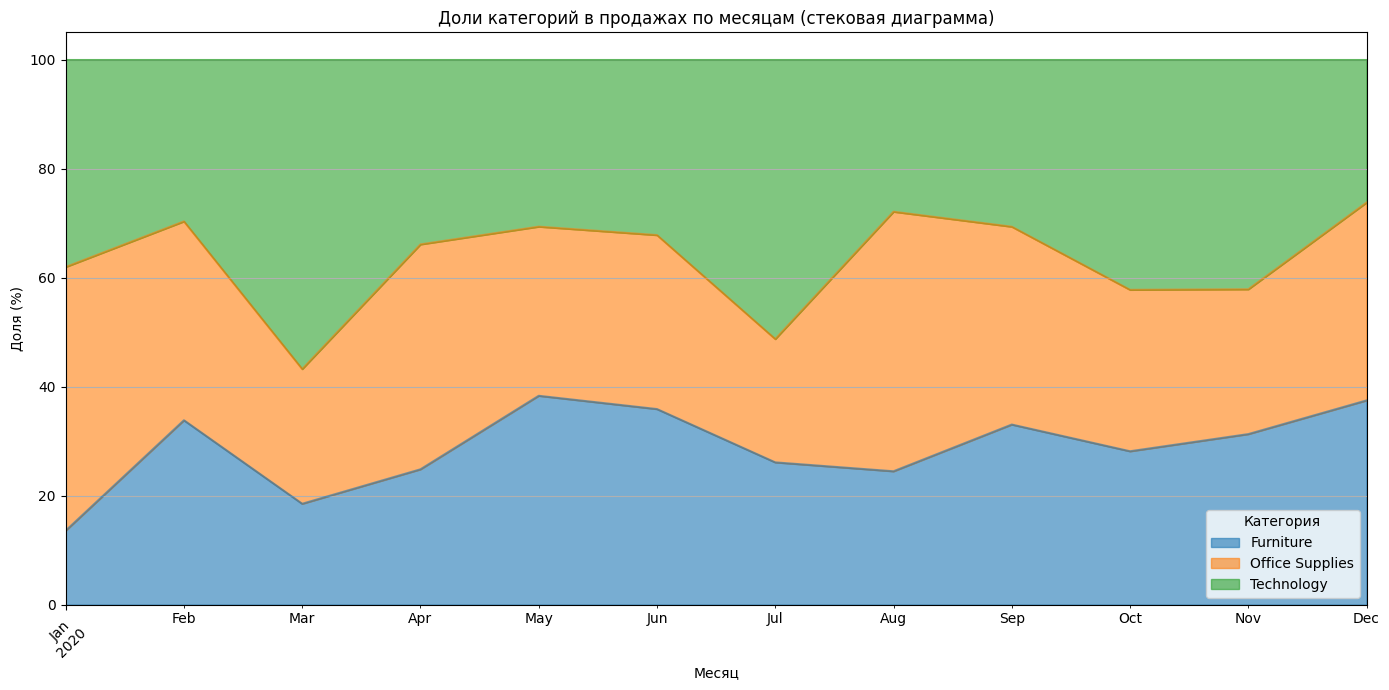

In [ ]:
# Нормализация — доля каждой категории в каждом месяце
category_monthly_share = category_monthly_sales.div(category_monthly_sales.sum(axis=1), axis=0) * 100

# Построим стековый график
category_monthly_share.plot(kind='area', stacked=True, figsize=(14, 7), alpha=0.6)
plt.title('Доли категорий в продажах по месяцам (стековая диаграмма)')
plt.xlabel('Месяц')
plt.ylabel('Доля (%)')
plt.xticks(rotation=45)
plt.legend(title='Категория')
plt.grid(True)
plt.tight_layout()
plt.show()

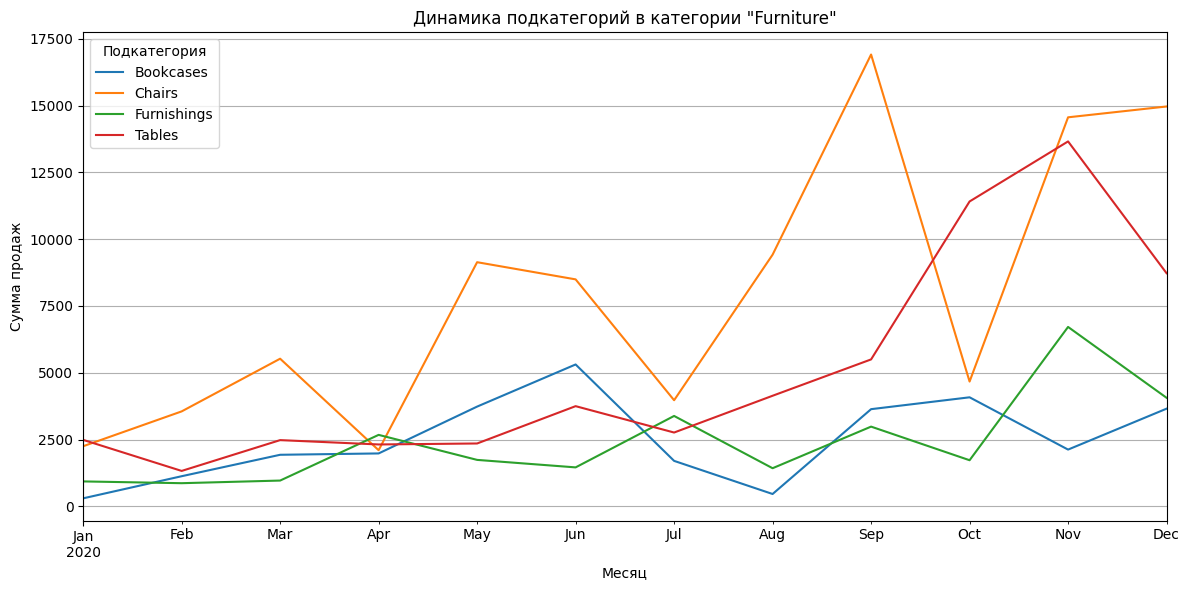

In [ ]:
# Пример: динамика подкатегорий внутри "Furniture"
furniture_data = df[df['category'] == 'Furniture']
furniture_trend = furniture_data.groupby([furniture_data['orderDate'].dt.to_period('M'), 'sub-category'])['sales'].sum().unstack(fill_value=0)

furniture_trend.plot(kind='line', figsize=(12, 6), title='Динамика подкатегорий в категории "Furniture"')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.legend(title='Подкатегория')
plt.grid(True)
plt.tight_layout()
plt.show()

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

### 🔍 Выявленные закономерности:

1. **Наибольшее количество заказов приходится на последние месяцы года**  
   Наблюдается рост числа заказов в ноябре и декабре, что указывает на наличие **сезонности**, вероятно связанной с праздничными распродажами и событиями вроде Black Friday.

2. **Категория "Office Supplies" является самой популярной по количеству продаж**  
   Эта категория лидирует по числу покупок, но не всегда по сумме выручки, что говорит о высокой частоте покупок недорогих товаров.

3. **Категория "Technology" приносит наибольшую выручку**  
   Хотя товары из этой категории реже покупаются, их высокая стоимость обеспечивает максимальный вклад в общие продажи.

4. **Топ-5 городов концентрируют значительную долю продаж**  
   Города, такие как **New York City**, **Los Angeles**, **Seattle**, имеют наибольшие объёмы продаж, что делает их ключевыми рынками для стратегического развития.

5. **Штаты California, New York и Texas — лидеры по сумме продаж**  
   Эти штаты демонстрируют стабильно высокий уровень активности, что может быть связано с плотностью населения и уровнем доходов.

6. **Различия в предпочтениях категорий между регионами**  
   В разных штатах/городах доминируют разные категории: например, в одном регионе чаще покупают технику, а в другом — канцелярию.

7. **Существуют города и штаты с низким уровнем продаж**  
   Это потенциальные зоны для маркетинговых кампаний и увеличения охвата.

8. **Некоторые товары сильно выделяются по популярности**  
   Например, определённые модели принтеров или офисных кресел встречаются в большем числе заказов и приносят существенную долю выручки.

9. **Доля убыточных заказов есть, но она невелика**  
   Большинство сделок прибыльные, однако есть отдельные заказы, где убыток может быть вызван высокими скидками или затратами на доставку.

10. **Высокая концентрация продаж среди небольшого числа клиентов**  
    Анализ RFM или ABC-анализ может показать, что часть клиентов генерирует основную массу выручки, что важно для персонализированного подхода в маркетинге.
